In [1]:
from math import pi
import os 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
dir = 'C:\\Users\\sdtla\\mycode\\Ml-Project\\PetImages'
catogories = ['Hor', 'Dog']
data = []

In [3]:

for catogory in catogories:
    path  = os.path.join(dir, catogory)
    label  = catogories.index(catogory)

    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        pet_img =cv2.imread(imgpath, 0)
        try:
            pet_img = cv2.resize(pet_img, (64,64))
            image = np.array(pet_img).flatten()
            data.append([image,label])
        except Exception as e:
            pass    
        # cv2.imshow('Image', pet_img)



In [4]:
print(len(data))

7436


In [5]:
pick_in = open('data64.pickle','wb')
pickle.dump(data, pick_in)
pick_in.close()

In [6]:
pick_in = open('data64.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

In [7]:
random.shuffle(data)
features =  []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)

x_train , x_test, y_train, y_test = train_test_split(features, labels, test_size=0.1)


In [8]:
print(len(x_train))
print(len(x_test))
print(type(y_test))

6692
744
<class 'list'>


In [9]:
model = SVC(C=1,kernel='poly',probability=True)
model.fit(x_train,y_train)


SVC(C=1, kernel='poly', probability=True)

In [10]:
# save the model 
pick = open('model64_update_poly.sav','wb')
pickle.dump(model, pick)
pick.close()

In [11]:
# load model 
pick = open('model64_update_poly.sav', 'rb')
model = pickle.load(pick)
pick.close()


In [12]:
model

SVC(C=1, kernel='poly', probability=True)

In [13]:
model.intercept_

array([0.44070509])

In [14]:
# calculate accuracy
from sklearn import metrics

prediction = model.predict(x_test)
print('Accuracy: ',metrics.accuracy_score(y_test, prediction))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Accuracy:  0.7701612903225806
Mean Absolute Error:  0.22983870967741934
Mean Squared Error:  0.22983870967741934
Root Mean Squared Error:  0.47941496605489836


In [ ]:
import pandas as pd
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df

In [14]:
# print the first 25 true and predicted responses
print('True:', y_test[0:25])
print('False:', prediction[0:25])

True: [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
False: [1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]


In [15]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, prediction))

[[ 231   15]
 [   9 1236]]


In [16]:
# print the first 25 true and predicted responses
print('True', y_test[0:25])
print('Pred', prediction[0:25])

True [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
Pred [1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]


In [17]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, prediction)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[ 231   15]
 [   9 1236]]


In [18]:
 # True Positives = 80, False Negatives = 148
 # False Positives = 14, True Negatives = 1249

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       246
           1       0.99      0.99      0.99      1245

    accuracy                           0.98      1491
   macro avg       0.98      0.97      0.97      1491
weighted avg       0.98      0.98      0.98      1491



In [20]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, prediction))

0.9839034205231388
0.9839034205231388


In [21]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, prediction))

0.01609657947686117
0.01609657947686116


In [22]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, prediction))

0.9927710843373494
0.9927710843373494


In [23]:
specificity = TN / (TN + FP)

print(specificity)

0.9390243902439024


In [24]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.06097560975609756
0.060975609756097615


In [25]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, prediction))

0.988009592326139
0.988009592326139


In [26]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
model.predict(x_test)[0:10]

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [27]:
# print the first 10 predicted probabilities of class membership
model.predict_proba(x_test)[0:10]

array([[0.01913337, 0.98086663],
       [0.11337222, 0.88662778],
       [0.1713017 , 0.8286983 ],
       [0.08653442, 0.91346558],
       [0.02330986, 0.97669014],
       [0.84674897, 0.15325103],
       [0.26767089, 0.73232911],
       [0.0332956 , 0.9667044 ],
       [0.01665348, 0.98334652],
       [0.14445351, 0.85554649]])

In [28]:
# print the first 10 predicted probabilities for class 1
model.predict_proba(x_test)[0:10, 1]

array([0.98086663, 0.88662778, 0.8286983 , 0.91346558, 0.97669014,
       0.15325103, 0.73232911, 0.9667044 , 0.98334652, 0.85554649])

In [29]:
# store the predicted probabilities for class 1
y_pred_prob = model.predict_proba(x_test)[:, 1]

In [30]:
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

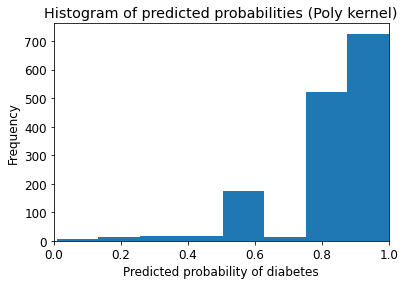

In [31]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities (Poly kernel)')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')
plt.savefig('histogram-of-predicted-probabilities-SVC(poly).png')

In [32]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
import numpy
# results are 2D so we slice out the first column
y_new = numpy.reshape(y_pred_prob, (1, -1))
y_pred_class = binarize(y_new, 0.2)[0]

C:\Users\sdtla\anaconda3\envs\torch181\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass threshold=0.2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [33]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.98086663, 0.88662778, 0.8286983 , 0.91346558, 0.97669014,
       0.15325103, 0.73232911, 0.9667044 , 0.98334652, 0.85554649])

In [34]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1.])

In [35]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[ 231   15]
 [   9 1236]]


In [36]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[  11  235]
 [   0 1245]]


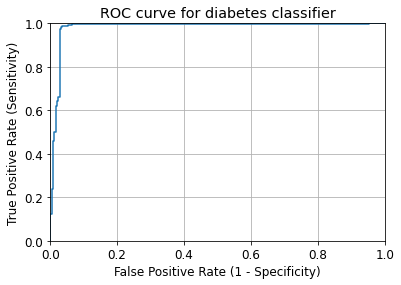

In [37]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.savefig('ROC-curve-for-diabetes-classifier-SVC(default).png')
plt.grid(True)

In [38]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [39]:
evaluate_threshold(0.5)

Sensitivity: 0.9983935742971888
Specificity: 0.426829268292683


In [40]:
evaluate_threshold(0.2)

Sensitivity: 1.0
Specificity: 0.04878048780487809


In [92]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8671465877679154


In [96]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_test, y_test, cv=10, scoring='roc_auc').mean()

0.7954121594484485

Predict is:  Dog
Accuracy:  0.7701612903225806


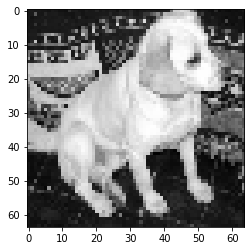

In [15]:
print('Predict is: ',catogories[prediction[1]])
print('Accuracy: ',metrics.accuracy_score(y_test, prediction))
mypet = x_test[100].reshape(64,64)
plt.imshow(mypet,cmap ='gray')
plt.savefig('mypet.png')
plt.show()


In [151]:
 #Setup arrays to store train and test accuracies
dep = np.arange(1, 10)

train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):

    #Compute accuracy on the training set
    train_accuracy[i] = model.score(x_train,y_train)

    #accuracy on the testing set
    test_accuracy[i] = model.score(x_test, y_test)

# Geneyate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.savefig('CompareTestandTrainAcc.png')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()